In [15]:
# libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import nltk
import re

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Set option to display all columns
pd.set_option('display.max_columns', None)

In [16]:
# Read .csv into a DataFrame
df = pd.read_csv('../data/marketing_campaign.csv', delimiter='\t') # dataframe loads as one column with the delimiter
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [17]:
df.info() 
# see 23 missing values for Income and Dt_Customer which is the last date of vist is an Object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
df.describe().T
# see a weird max of 666666 for income.

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


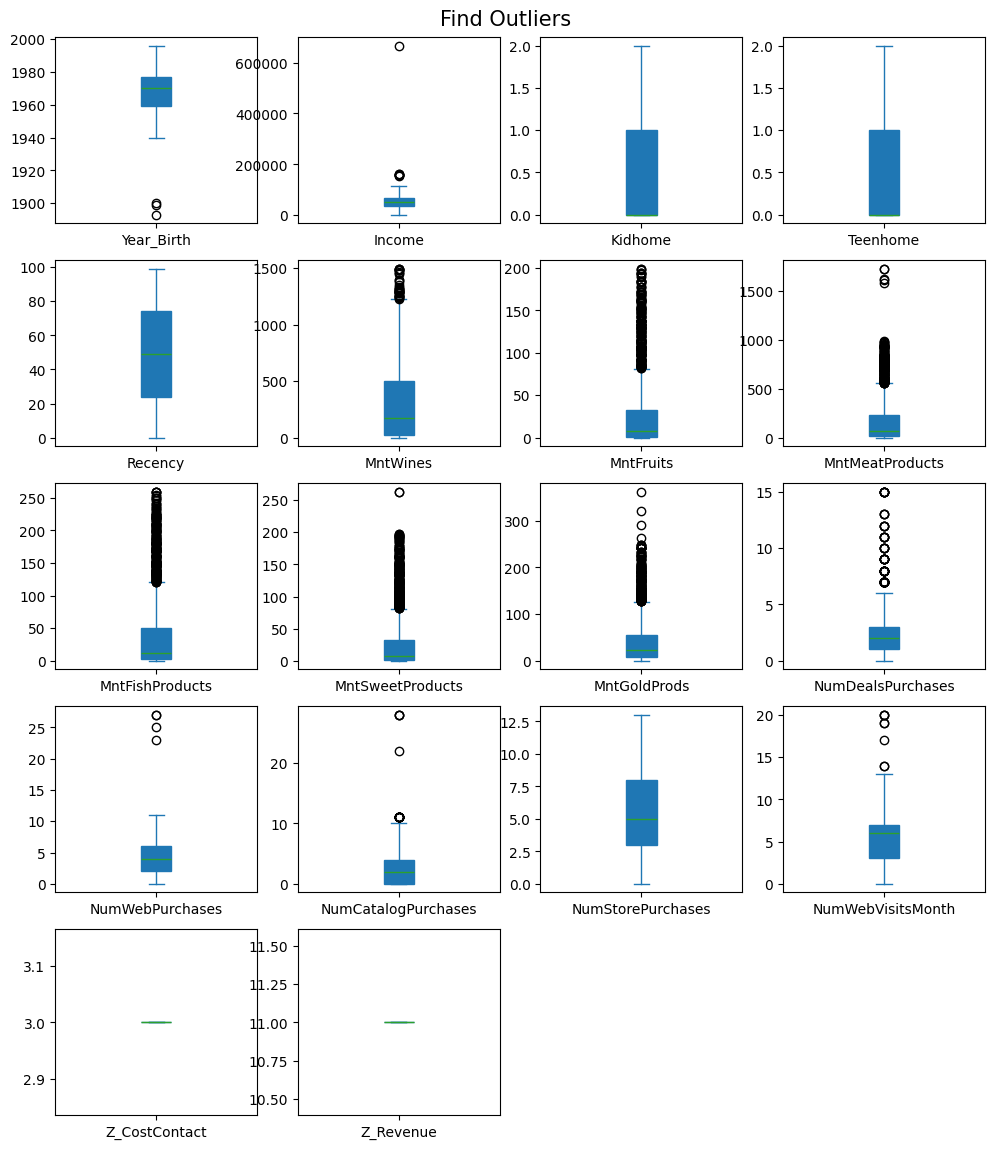

In [19]:
# See if there is any outliers

# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(5, 4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.show()

# the 666666 income seen in our above decribe for the Max income is proven to be most likely false data.

In [20]:
# changed Dt_Customer from Object data type to datetime data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

# Dropping all rows that have null values and the row with an income of 666666. I think the 666666 was not a truthfull entry.
# Dropping these rows I think will give us a more accurate model
df_clean = df.dropna(subset=['Income'], inplace=True)
df_clean = df.query('Income != 666666')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [21]:
# Feature engineering. Created Columns totalSpent, totalPurchases, and AcceptedCmpTotal
df_clean['totalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
#df_clean['age'] = 2024 - df['Year_Birth'] # further analysis showed a max age of 131 so I looked at the min birth year and saw 1893 as the earliest birth year. This is not a good column to create
df_clean['totalPurchases'] = df_clean['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] # combining all purchase sources 
df_clean['AcceptedCmpTotal'] = df_clean['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] # totaling up number of campaigns responded to
df_clean.head()

C:\Users\Justin\AppData\Local\Temp\ipykernel_10548\3719415405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['totalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
C:\Users\Justin\AppData\Local\Temp\ipykernel_10548\3719415405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['totalPurchases'] = df_clean['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,totalSpent,totalPurchases,AcceptedCmpTotal
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2163,22.0,0.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,33,4.0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,903,20.0,0.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,73,6.0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,540,14.0,0.0


In [22]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data of selected features for DBSCAN

# Selecting relevant features
features = df_clean[['totalPurchases', 'NumWebVisitsMonth', 'AcceptedCmpTotal', 'totalSpent', 'Recency']]

# Normalizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
print(features_scaled.shape)
features_scaled[:5]


(2215, 5)


array([[ 1.31047314,  0.69321464, -0.4393832 ,  1.73260986,  0.31011292],
       [-1.18826259, -0.13142039, -0.4393832 , -0.92504404, -0.38089872],
       [ 1.03283584, -0.5437379 , -0.4393832 ,  0.16047657, -0.79550571],
       [-0.91062529,  0.28089712, -0.4393832 , -0.87513505, -0.79550571],
       [ 0.19992393, -0.13142039, -0.4393832 , -0.29244755,  1.55393388]])

In [23]:
from sklearn.cluster import DBSCAN
# Creating our clusters

# Applying DBSCAN
dbscan = DBSCAN(eps=1, min_samples=6)  # determined about .75-1 for eps and 6 for min_samples. for min_samples used rule of thumb where min_samples = D + 1, where D is the dimensionality of the dataset.
clusters = dbscan.fit_predict(features_scaled)

# Adding the cluster labels to dataframe
df_clean['Cluster'] = clusters

print(df_clean['Cluster'].value_counts())


Cluster
 0    1738
 2     319
-1      79
 1      34
 4      23
 3      13
 5       9
Name: count, dtype: int64


C:\Users\Justin\AppData\Local\Temp\ipykernel_10548\3829127521.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = clusters


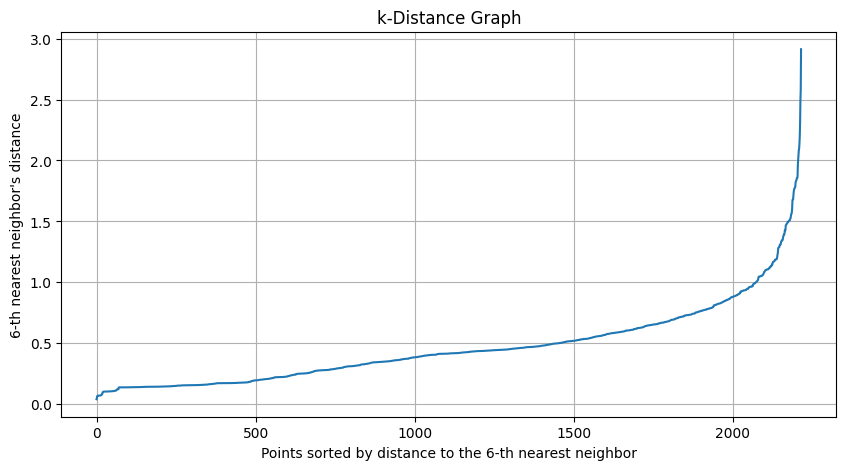

In [24]:
# Creating a k-Distance Graph to use "elbow" method to figure out a good eps value for our DBSCAN function

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 6  # The 'k' in k-distance. Choose based on dataset size and dimensionality

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(features_scaled)
distances, indices = neighbors.kneighbors(features_scaled)

# Sort the distances
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Points sorted by distance to the {}-th nearest neighbor'.format(k))
plt.ylabel('{}-th nearest neighbor\'s distance'.format(k))
plt.title('k-Distance Graph')
plt.grid(True)
plt.show()

In [25]:
# DBSCAN has clustered the majority of customers into one cluster whitch for this iteration is cluster 0.
# Looking at cluster 0(1738 people out of 2215. Its huge compaired to the other clusters) they have the lowest income, highest average kids at home and top for teens at home, and overall lowest sales and engament.
# web visits a little above average.
# Because cluster 0 is very easy and clear to identify attributes and they are the biggest by a large margin they should be targeted. suggested business strategy I think would  be to have cheaper or attainable products.
# All other clusters are harder to fully identify characteristics.
df_cleangroupby = df_clean.drop(columns=['Marital_Status', 'Education', 'ID', 'Dt_Customer', 'Recency','Complain','Z_CostContact', 'Z_Revenue'])
df_cleangroupby.groupby('Cluster').mean()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,totalSpent,totalPurchases,AcceptedCmpTotal
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
-1,1970.113924,69668.481013,0.139241,0.354430,745.962025,35.481013,353.506329,47.227848,45.354430,63.531646,2.126582,5.164557,5.291139,6.746835,6.037975,0.189873,0.506329,0.531646,0.518987,0.291139,0.531646,1644.569620,17.202532,2.037975
0,1969.005178,48463.321059,0.500575,0.535673,224.573072,23.821634,132.371116,33.236479,23.684120,38.756041,2.387802,3.782509,2.161105,5.527043,5.439586,0.000000,0.000000,0.000000,0.000000,0.000000,0.082854,608.813579,11.470656,0.000000
1,1970.264706,83258.882353,0.000000,0.029412,888.794118,62.264706,473.088235,92.941176,64.882353,77.352941,0.911765,5.411765,6.617647,8.205882,2.205882,0.176471,0.352941,0.794118,0.647059,0.029412,0.676471,2132.411765,20.235294,2.000000
2,1967.166144,59590.416928,0.288401,0.457680,500.307210,30.620690,240.391850,48.595611,32.351097,59.269592,2.247649,5.084639,3.884013,6.567398,5.043887,0.401254,0.260188,0.178683,0.156740,0.003135,0.310345,1151.927900,15.536050,1.000000
3,1968.076923,80120.692308,0.230769,0.538462,912.230769,34.076923,308.923077,70.846154,62.923077,57.307692,1.615385,6.615385,5.769231,7.846154,4.153846,0.230769,0.615385,0.846154,0.307692,0.000000,0.230769,1755.230769,20.230769,2.000000
4,1970.260870,84560.217391,0.000000,0.000000,907.782609,78.260870,612.913043,97.913043,75.739130,95.652174,0.869565,4.956522,7.391304,7.478261,2.086957,0.434783,0.565217,1.000000,0.869565,0.130435,0.739130,2481.173913,19.826087,3.000000
5,1971.444444,61509.111111,0.222222,0.777778,475.555556,6.444444,130.444444,7.333333,7.000000,61.777778,4.222222,6.888889,3.888889,7.222222,7.111111,0.111111,0.888889,0.222222,0.555556,0.222222,0.555556,819.000000,18.000000,2.000000


In [26]:
df_clean[df_clean['Cluster'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,totalSpent,totalPurchases,AcceptedCmpTotal,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2163,22.0,0.0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,33,4.0,0.0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,903,20.0,0.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,73,6.0,0.0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,540,14.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0,28,3.0,0.0,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,37,3.0,0.0,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1523,16.0,0.0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,1057,21.0,0.0,0
